# Homework – Spectral Analysis 
## IEOR 135/290, Data-X: Applied Data Ventures
Author: Sudarshan Gopalakrishnan (in collaboration with Ikhlaq Sidhu)

UC Berkeley, B.S. EECS'21

Email: sudarshan.gopal@berkeley.edu



## Objective

In this homework, we will explore using spectral analysis to understand how you can generate features that you can use to build classification and predictive models for timeseries data. 

### Setting Up Imports and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import librosa

%matplotlib inline

sns.set(rc={'figure.figsize':(14,6)})


Bad key "text.dvipnghack" on line 127 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "an

In [2]:
samples, sampling_rate = librosa.load("audio.wav", sr=None, mono=True, offset=0.0, duration=None)

len(samples), sampling_rate

(408226, 8000)

### Your Audio File

Text(0, 0.5, 'Normalized Aplitude')

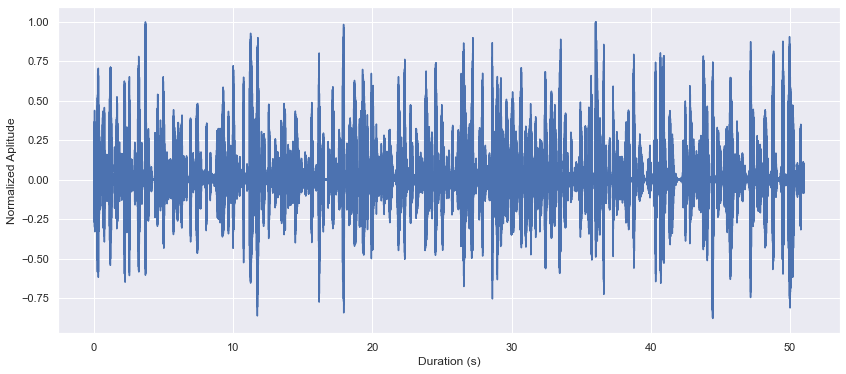

In [3]:
plt.plot(np.linspace(start=0, stop=len(samples)/sampling_rate, num=len(samples)), samples)
plt.xlabel("Duration (s)")
plt.ylabel("Normalized Aplitude")


### Question 1
Compute the fourier transformation of the HSN1F Value in the dataset, and store it in fft_hsn1f.

In [4]:
freq = np.fft.fftfreq(len(samples), 1/sampling_rate)
fft_x = np.fft.fft(samples)
fft_x[:10]

array([-13.42599487-1.95399252e-14j,  -1.36993296+1.32617380e+00j,
         1.67494712-7.51036642e-01j,  -0.7620272 -1.31070264e+00j,
        -0.06158857+1.25265461e+00j,  -0.59350269-1.85841899e+00j,
        -3.10299434+2.09155080e+00j,  -2.28526286+2.02391654e-01j,
        -1.5972473 +6.11556284e-01j,  -0.43494366-2.56443912e-01j])

-------------------
As expected, you notice a real and an imaginary component in the above array. The plot below shows fft_hsn1f plotted vs samples


**Plot:** Fourier Transformation of Audio File vs. Sample Count

Text(0, 0.5, 'Fourier Transformation')

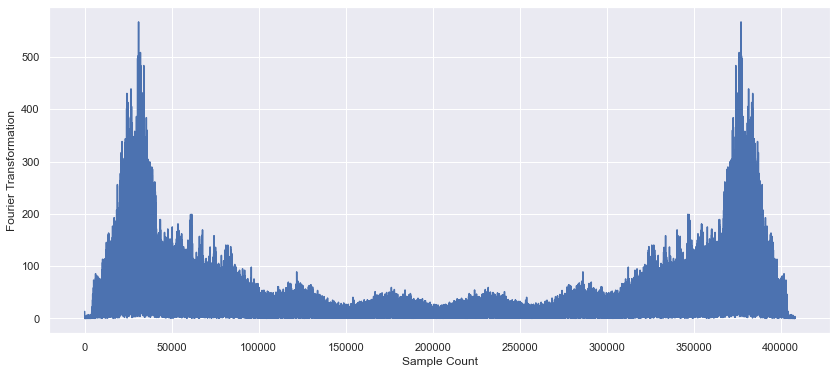

In [17]:
plt.plot(abs(fft_x))
plt.xlabel("Sample Count")
plt.ylabel("Fourier Transformation")

### Question 2
What do you notice about this signal?

In [6]:
# Use this space to manipulate the signal for your analysis

*Your answer here*

### Question 3

**Question 3a: Shifting**

Use the Swap Half Spaces technique to process the FFT signal. Generate plots and discuss your conclusions.

In [14]:
# Write your code here

# fft_x_shifted = np.fft.fftshift(fft_x)
# freq_shifted = np.fft.fftshift(freq)

In [15]:
# Write your code here to generate plots

# plt.plot(freq_shifted, np.abs(fft_x_shifted))
# plt.xlabel("Frequency (Hz)")

*Discuss your conclusions here*

**Question 3b: Folding**

Use the Fold Negative Frequencies technique to process the FFT Signal 

In [12]:
# Write your code here

# half_n = int(np.ceil(len(samples)/2.0))
# fft_x_half = (2.0 / len(samples)) * fft_x[:half_n]
# freq_half = freq[:half_n]

In [13]:
# Write your code here to generate plots


# plt.plot(freq_half, np.abs(fft_x_half))
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Amplitude")

*Discuss your conclusions here*

### Question 4

**Question 4a: What are some techniques that you can use to identify features?**

*Discuss your answers here*

**[BONUS] Question 4b: Create a spectogram of the FFT signal such that you can use it for classification?**